# [practice] Data Cleaning - Titanic

## Treating duplicates

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

url = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv?raw=true'
titanic = pd.read_csv(url)
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
duplicates = titanic.duplicated(subset = 'Ticket', keep = False)
print(duplicates.shape)  # A Series of True and False

titanic_dup = titanic[duplicates].sort_values(by = 'Ticket')
print(titanic_dup[['Ticket','Name','Survived','Age']])

(891,)
         Ticket                                               Name  Survived  \
257      110152                               Cherry, Miss. Gladys         1   
759      110152  Rothes, the Countess. of (Lucy Noel Martha Dye...         1   
504      110152                              Maioni, Miss. Roberta         1   
262      110413                                  Taussig, Mr. Emil         0   
558      110413             Taussig, Mrs. Emil (Tillie Mandelbaum)         1   
..          ...                                                ...       ...   
736  W./C. 6608            Ford, Mrs. Edward (Margaret Ann Watson)         0   
86   W./C. 6608                             Ford, Mr. William Neal         0   
147  W./C. 6608                   Ford, Miss. Robina Maggie "Ruby"         0   
540   WE/P 5735                            Crosby, Miss. Harriet R         1   
745   WE/P 5735                       Crosby, Capt. Edward Gifford         0   

      Age  
257  30.0  
759  33.

Here we don't merge duplicate Ticket records, because it's like the people who hold the same ticket represents a group of people, maybe a couple, family, or friends.

**Later we can separate data into two datasets: 1. With group ticket / 2. Travel alone**

Here is an example, if we want to merging the incomplete duplicate rows into one while keeping the aggregate value for result. Here we want to just keep only one record by Customer ID, and  keep the Order to max() and C to average.

In [3]:
df = pd.DataFrame({'Customer ID': [1, 1, 2, 2, 3],'Order': [1, 2, 3, 4, 2],'C': np.random.randn(5)})

statistics = {'Order': 'max', 'C': 'mean'}
df.groupby('Customer ID').agg(statistics)

,Order,C
Customer ID,,
1,2,-0.977791
2,4,0.340787
3,2,-0.713315


In [4]:
# then reset_index()
df.groupby('Customer ID').agg(statistics).reset_index()

,Customer ID,Order,C
0,1,2,-0.977791
1,2,4,0.340787
2,3,2,-0.713315


## Missing Data - Using missingno

In [5]:
titanic.isna().sum()   # the same as isnull()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
!pip install missingno
import missingno as msno

### missingno - Barplot

<AxesSubplot:>

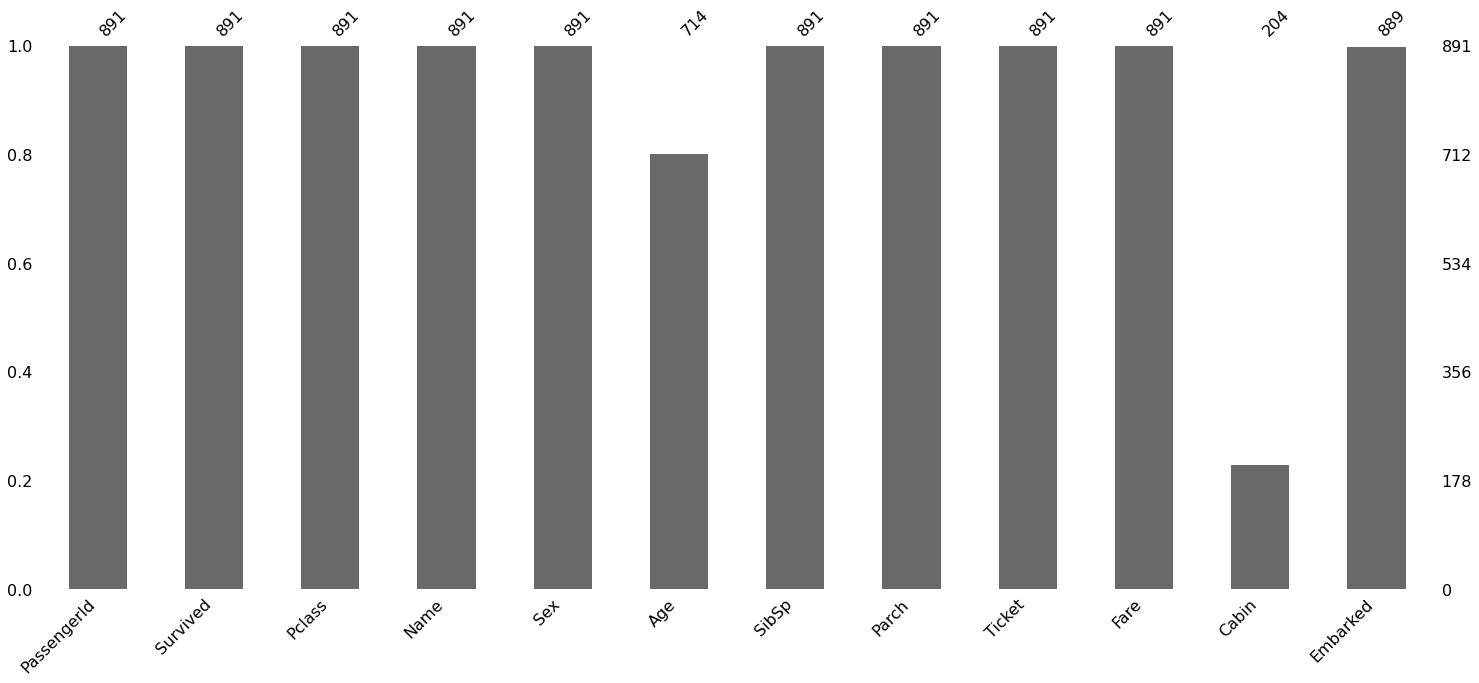

In [7]:
msno.bar(titanic)

### Matrix Plot

<AxesSubplot:>

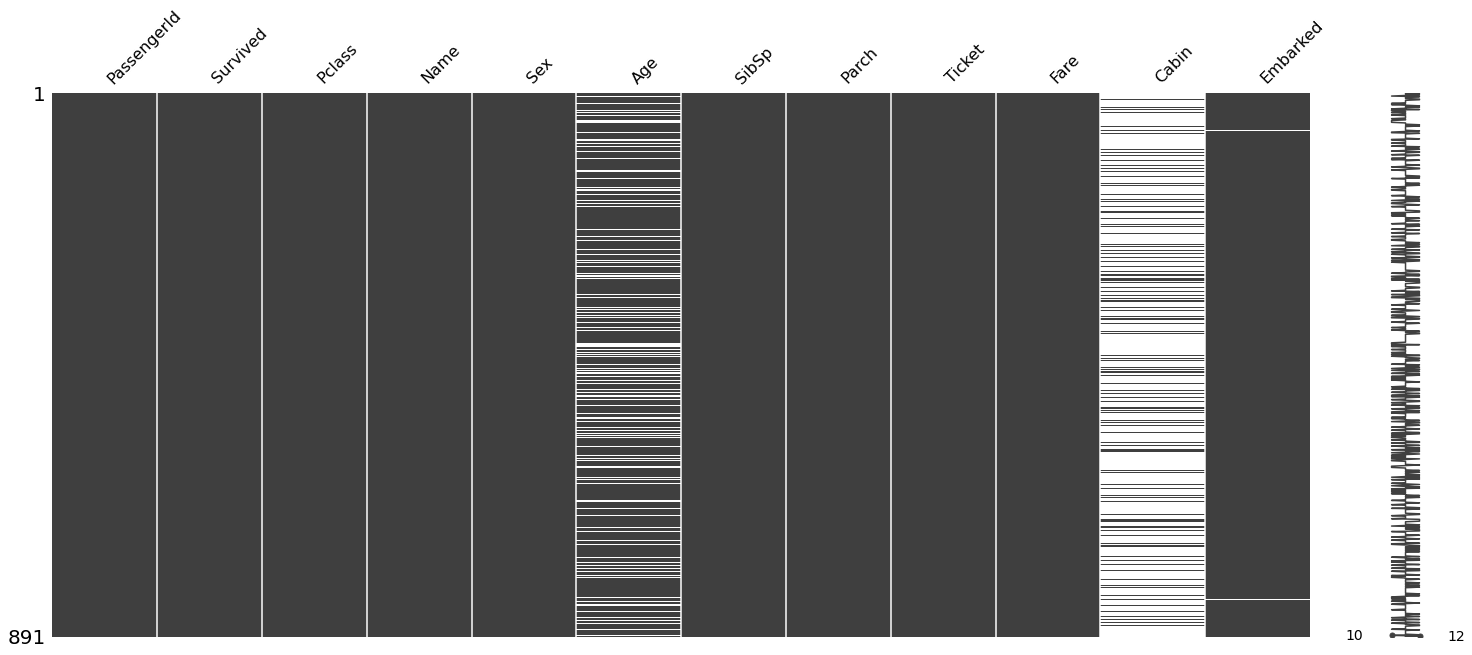

In [8]:
msno.matrix(titanic)     # also have Heatmap() / dendrogram() plot
# seaborn can also run the same plot but the presentation is not very clear
# sns.heatmap(titanic.isnull(), cbar = False).set_title("Missing values heatmap")

### Clean missing data 
### Delete data with missing rows

In [9]:
print(f"The original size of our dataset was {titanic.shape}")

titanic = titanic.dropna(subset = ["Embarked"])
titanic = titanic.reindex()

print(f"The new size of our dataset was {titanic.shape}")


The original size of our dataset was (891, 12)
The new size of our dataset was (889, 12)


### Replace empty values with the mean or median for that data.

In [10]:
# impute data for the Age field. We use the mean Age from the remaining rows, given that >80% of these aren't empty

mean_age = titanic['Age'].mean()
print(f"The mean age is {mean_age}")

# Replace empty values in "Age" with the mean calculated above
titanic["Age"].fillna(mean_age, inplace = True)
titanic.isnull().sum()

The mean age is 29.64209269662921


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Assign a new category to unknown categorical data

In [11]:
titanic["Cabin"].fillna("Unknown", inplace = True)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Assign new Column from groupby another column

In [12]:
titanic['grouped'] = titanic.groupby(['Ticket'])['Ticket'].transform('count')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
 12  grouped      889 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.2+ KB


### Change 1,0 Boolean into "Yes"/"No"

In [13]:
#titanic['Survived'] = titanic['Survived'].map({1: 'Yes', 0: 'No'})
#titanic.sample(5)

In [14]:
def Transform_Category(df):

    # PClass map{dict}
    pclass_map = {1: '1st Class', 2: '2nd Class', 3: '3rd Class'}
    df['Pclass'] = df['Pclass'].map(pclass_map)

    # Embarkation port map{dict}
    port_map = {'S': 'Southampton', 'C': 'Cherbourg','Q':'Queenstown'}
    df['Embarked'] = df['Embarked'].map(port_map)
    
    # add new column (FamilySize) to dataframe - sum of SibSp and Parch
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    return df

titanic = Transform_Category(titanic)
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,grouped,FamilySize
195,196,1,1st Class,"Lurette, Miss. Elise",female,58.000000,0,0,PC 17569,146.5208,B80,Cherbourg,2,0
540,541,1,1st Class,"Crosby, Miss. Harriet R",female,36.000000,0,2,WE/P 5735,71.0000,B22,Southampton,2,2
107,108,1,3rd Class,"Moss, Mr. Albert Johan",male,29.642093,0,0,312991,7.7750,Unknown,Southampton,1,0
66,67,1,2nd Class,"Nye, Mrs. (Elizabeth Ramell)",female,29.000000,0,0,C.A. 29395,10.5000,F33,Southampton,1,0
275,276,1,1st Class,"Andrews, Miss. Kornelia Theodosia",female,63.000000,1,0,13502,77.9583,D7,Southampton,3,1
672,673,0,2nd Class,"Mitchell, Mr. Henry Michael",male,70.000000,0,0,C.A. 24580,10.5000,Unknown,Southampton,1,0
185,186,0,1st Class,"Rood, Mr. Hugh Roscoe",male,29.642093,0,0,113767,50.0000,A32,Southampton,1,0
803,804,1,3rd Class,"Thomas, Master. Assad Alexander",male,0.420000,0,1,2625,8.5167,Unknown,Cherbourg,1,1
602,603,0,1st Class,"Harrington, Mr. Charles H",male,29.642093,0,0,113796,42.4000,Unknown,Southampton,1,0
777,778,1,3rd Class,"Emanuel, Miss. Virginia Ethel",female,5.000000,0,0,364516,12.4750,Unknown,Southampton,2,0


### Assign a new column with [Age Group]

In [15]:
bins= [0,10,21,31,41,51,61,71,81,91]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','70-80','80-90','over90']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=bins, labels=labels, right=False)
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,grouped,FamilySize,AgeGroup
19,20,1,3rd Class,"Masselmani, Mrs. Fatima",female,29.642093,0,0,2649,7.2250,Unknown,Cherbourg,1,0,20-30
454,455,0,3rd Class,"Peduzzi, Mr. Joseph",male,29.642093,0,0,A/5 2817,8.0500,Unknown,Southampton,1,0,20-30
131,132,0,3rd Class,"Coelho, Mr. Domingos Fernandeo",male,20.000000,0,0,SOTON/O.Q. 3101307,7.0500,Unknown,Southampton,1,0,10-20
314,315,0,2nd Class,"Hart, Mr. Benjamin",male,43.000000,1,1,F.C.C. 13529,26.2500,Unknown,Southampton,3,2,40-50
503,504,0,3rd Class,"Laitinen, Miss. Kristina Sofia",female,37.000000,0,0,4135,9.5875,Unknown,Southampton,1,0,30-40
331,332,0,1st Class,"Partner, Mr. Austen",male,45.500000,0,0,113043,28.5000,C124,Southampton,1,0,40-50
692,693,1,3rd Class,"Lam, Mr. Ali",male,29.642093,0,0,1601,56.4958,Unknown,Southampton,7,0,20-30
138,139,0,3rd Class,"Osen, Mr. Olaf Elon",male,16.000000,0,0,7534,9.2167,Unknown,Southampton,2,0,10-20
509,510,1,3rd Class,"Lang, Mr. Fang",male,26.000000,0,0,1601,56.4958,Unknown,Southampton,7,0,20-30
811,812,0,3rd Class,"Lester, Mr. James",male,39.000000,0,0,A/4 48871,24.1500,Unknown,Southampton,2,0,30-40


In [16]:
titanic_single = titanic[titanic['grouped'] == 1]

In [17]:
titanic_group = titanic[titanic['grouped'] >= 2]
titanic_group.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,grouped,FamilySize,AgeGroup
3,4,1,1st Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,2,1,30-40
7,8,0,3rd Class,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,Unknown,Southampton,4,4,0-10
8,9,1,3rd Class,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Unknown,Southampton,3,2,20-30
9,10,1,2nd Class,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,Unknown,Cherbourg,2,1,10-20
10,11,1,3rd Class,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,Southampton,2,2,0-10


Text(0.5, 0.98, 'Distribution of Survival Counts for Age Group show in Different Classes')

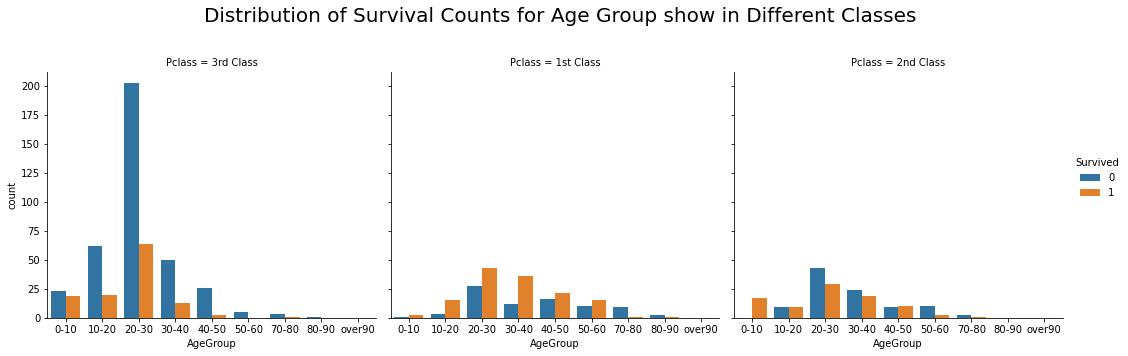

In [18]:
_ = sns.catplot(x = "AgeGroup", hue = "Survived", col = "Pclass",
                data = titanic, kind = "count",
                height = 5)
_.fig.subplots_adjust(top=.8)
#add overall title
_.fig.suptitle('Distribution of Survival Counts for Age Group show in Different Classes', fontsize=20)

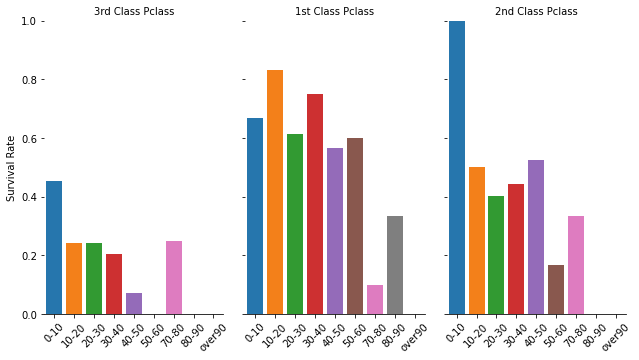

In [19]:
_ = sns.catplot(x = "AgeGroup", y = "Survived", col = "Pclass", data=titanic, saturation=.9,
                kind="bar", ci=None, aspect=.6)
(_.set_axis_labels("", "Survival Rate")
  .set_xticklabels(rotation = 45)
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  

In [20]:
sig_w = titanic_single[titanic_single['Sex'] == 'female']['Age'].mean()
print(f"Female who travel alone the average age is {sig_w}")
sig_m = titanic_single[titanic_single['Sex'] == 'male']['Age'].mean()
print(f"Male who travel alone the average age is {sig_m}")

Female who travel alone the average age is 29.38043727989267
Male who travel alone the average age is 32.02573673041872


<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

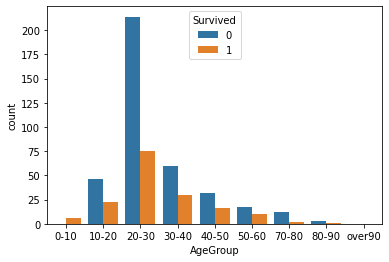

In [21]:
sns.countplot( x = "AgeGroup", hue = "Survived", data = titanic_single)

<AxesSubplot:xlabel='FamilySize'>

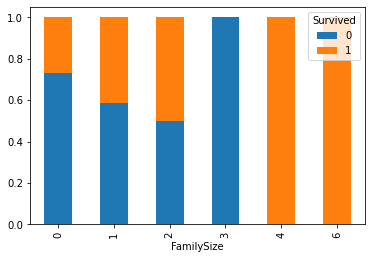

In [22]:
pd.crosstab(titanic_single.FamilySize, titanic_single.Survived, normalize='index').plot.bar(stacked=True)

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

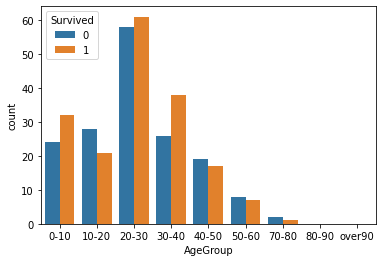

In [23]:
sns.countplot( x = "AgeGroup", hue = "Survived", data = titanic_group)

In [24]:
pd.crosstab(titanic_group.AgeGroup, titanic_group.Survived, margins=True, margins_name="Total")

Survived,0,1,Total
AgeGroup,,,
0-10,24,32,56
10-20,28,21,49
20-30,58,61,119
30-40,26,38,64
40-50,19,17,36
50-60,8,7,15
70-80,2,1,3
Total,165,177,342


<AxesSubplot:xlabel='FamilySize'>

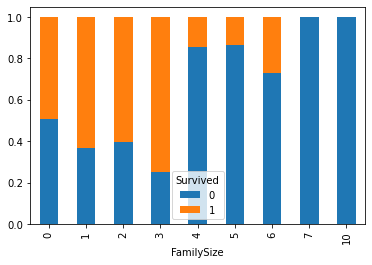

In [25]:
pd.crosstab(titanic_group.FamilySize, titanic_group.Survived, normalize='index').plot.bar(stacked=True)

In [26]:
# Create some simple functions
# Read their descriptions to find out more 
def get_rows(sex, port):
    '''Returns rows that match in terms of sex and embarkment port'''
    return titanic[(titanic.Embarked == port) & (titanic.Sex == sex)]

def proportion_survived(sex, port):
    '''Returns the proportion of people meeting criteria who survived'''
    survived = get_rows(sex, port).Survived
    return np.mean(survived)

# Make two columns of data - together these represent each combination
# of sex and embarkment port
sexes = ["male", "male", "male", "female","female", "female"]
ports = ["Cherbourg", "Queenstown", "Southampton" ] * 2

# Calculate the number of passengers at each port + sex combination
passenger_count = [len(get_rows(sex, port)) for sex,port in zip(sexes, ports)]

# Calculate the proportion of passengers from each port + sex combination who survived
passenger_survival = [proportion_survived(sex, port) for sex,port in zip(sexes, ports)]

# Combine into a single data frame
table = pd.DataFrame(dict(
    sex=sexes,
    port=ports,
    passenger_count=passenger_count,
    passenger_survival_rate=passenger_survival
))

In [27]:
print(table)

      sex         port  passenger_count  passenger_survival_rate
0    male    Cherbourg               95                 0.305263
1    male   Queenstown               41                 0.073171
2    male  Southampton              441                 0.174603
3  female    Cherbourg               73                 0.876712
4  female   Queenstown               36                 0.750000
5  female  Southampton              203                 0.689655


In [113]:
table_1 = pd.pivot_table(titanic, index =['Sex','Embarked'], values =['Survived','PassengerId'], 
                         aggfunc= {'Survived': np.mean,'PassengerId':len }).reset_index()
table_1.rename(columns = {'PassengerId' : 'Passenger_count','Survived':'Survival_rate'} )

,Sex,Embarked,Passenger_count,Survival_rate
0,female,Cherbourg,73,0.876712
1,female,Queenstown,36,0.750000
2,female,Southampton,203,0.689655
3,male,Cherbourg,95,0.305263
4,male,Queenstown,41,0.073171
5,male,Southampton,441,0.174603
